Testing SymPy to Symbolics.jl conversions
09/07/2023

In [34]:
from juliacall import Main as jl
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import juliapkg


Resolve Julia packages from juliapkg.json

In [35]:
juliapkg.resolve()

True

Include the required Julia packages

In [36]:
jl.seval("using Symbolics")
jl.seval("using ModelingToolkit")
jl.seval("using SymPyPythonCall")
jl.seval("using DifferentialEquations")

Create a SymPy Equality

In [37]:
fol = sp.sympify("Eq(Derivative(x(t),t), (1 - x(t))/3.0)")

In [38]:
fol

Eq(Derivative(x(t), t), 0.333333333333333 - 0.333333333333333*x(t))

Convert SymPy Equality to Symbolics.jl Equation

In [39]:
jl.pyconvert(jl.Symbolics.Equation,fol)

0.3333333333333333 - 0.3333333333333333x(t) ~ Differential(t)(x(t))

Get vector of symbolic dependant variables in the equation

In [40]:
vars = jl.Symbolics.get_variables(fol)

Get the independant variable of the equality (in this case just "t")

In [41]:
args = jl.arguments(vars[0])[0]

Set up ModelingToolkit ODESystem

In [42]:
odesys = jl.ODESystem(fol,jl.arguments(vars[0])[0], name = jl.Symbol("odesys"))

Simplify equation so that derivative is on LHS

In [43]:
simplified = jl.structural_simplify(odesys)

In [44]:
prob = jl.ODEProblem(simplified,[0.0], (0.0,10.0))

In [45]:
sol = jl.solve(prob,jl.Tsit5())

In [46]:
intersol = sol(np.arange(0,10,0.01))

In [47]:
tnums = intersol.t

In [48]:
solnums = jl.reduce(jl.vcat,intersol.u)

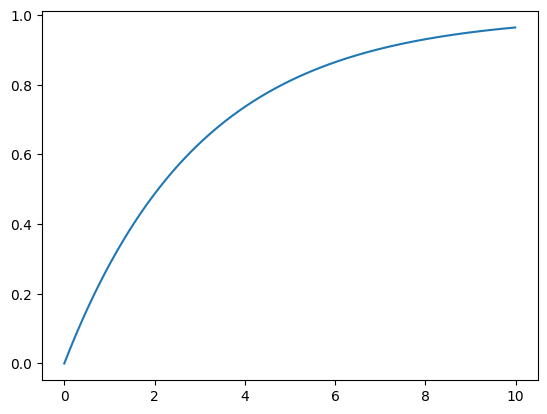

In [49]:
plt.plot(tnums,solnums)

Make SymPy system of equations

In [22]:
spsys = sp.sympify("[Eq(Derivative(x(t),t), (1 - x(t))/3.0), Eq(Derivative(y(t),t), (1 + y(t))/3.0)]")

Get both symbolic dependant variables in the equation

In [23]:
sysvar1 = jl.Symbolics.get_variables(spsys[0])
sysvar2 = jl.Symbolics.get_variables(spsys[1])

In [24]:
odebigsys = jl.ODESystem(spsys,jl.arguments(sysvar1[0])[0], name = jl.Symbol("odesys"))

In [25]:
bigsimplified = jl.structural_simplify(odebigsys)

In [26]:
bigprob = jl.ODEProblem(bigsimplified,[0.0, 0.1], (0.0,10.0))

In [27]:
bigsol = jl.solve(bigprob,jl.Tsit5())

In [28]:
bigsol

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 12-element Vector{Float64}:
  0.0
  0.0029701208832612833
  0.032671329715874116
  0.23808000868921736
  0.7092847935693931
  1.401441340697768
  2.2826148488430587
  3.4063606967843505
  4.763168498113075
  6.370941753177284
  8.218989222543868
 10.0
u: 12-element Vector{Vector{Float64}}:
 [0.0, 0.1]
 [0.0009895503662243625, 0.1010895836006979]
 [0.010831357047777932, 0.1120449559713058]
 [0.076292672726754, 0.19085338779025618]
 [0.21055748766448987, 0.393388352429212]
 [0.37321211409603927, 0.7549797055553776]
 [0.5327409726024249, 1.354154848207483]
 [0.6787234507647881, 2.423843228291658]
 [0.7956090187710207, 4.3818525574459795]
 [0.880404393773177, 8.19772431378179]
 [0.9354063480333682, 16.02987735023362]
 [0.9643247203754745, 29.834602742421904]

In [29]:
bigsol.t

12-element Vector{Float64}:
  0.0
  0.0029701208832612833
  0.032671329715874116
  0.23808000868921736
  0.7092847935693931
  1.401441340697768
  2.2826148488430587
  3.4063606967843505
  4.763168498113075
  6.370941753177284
  8.218989222543868
 10.0

In [30]:
bigsolnums = jl.reduce(jl.hcat,bigsol.u)

In [31]:
bigsolx = bigsolnums[0,:]

In [32]:
bigsoly = bigsolnums[1,:]

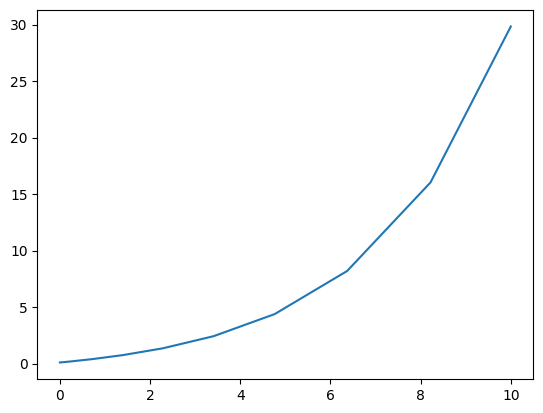

In [33]:
plt.plot(bigsol.t,bigsoly)

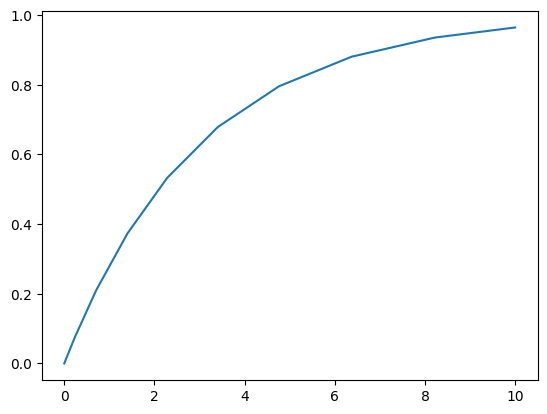

In [110]:
plt.plot(bigsol.t,bigsolx)